In [1]:
import numpy as np
import time
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

In [33]:
d = np.loadtxt("data1000.txt")
d.shape

(508, 1000)

In [34]:
X_train = d[0:8, 0:900].T
X_test = d[0:8, 900:1000].T

y_train = d[8:509, 0:900].T
y_test = d[8:509, 900:1000].T

In [35]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [36]:
X_train.shape

(900, 8)

In [37]:
y_train.shape

(900, 500)

In [49]:
model = models.Sequential()

model.add(layers.Dense(200, activation = "relu", input_dim = 8))

model.add(layers.Dense(3, activation = "selu"))

model.add(layers.Dense(800, activation = "relu"))

model.add(layers.Dense(500))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

hist = model.fit(X_train, y_train, epochs = 130, batch_size = 32, validation_split = 0.15)

Epoch 1/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 549.6049 - mse: 549.6049 - val_loss: 493.4749 - val_mse: 493.4749
Epoch 2/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 448.3049 - mse: 448.3049 - val_loss: 219.8831 - val_mse: 219.8831
Epoch 3/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 171.6443 - mse: 171.6443 - val_loss: 104.0177 - val_mse: 104.0177
Epoch 4/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 107.4988 - mse: 107.4988 - val_loss: 96.5617 - val_mse: 96.5617
Epoch 5/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 102.6083 - mse: 102.6083 - val_loss: 95.7290 - val_mse: 95.7290
Epoch 6/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 100.6790 - mse: 100.6790 - val_loss: 95.3772 - val_mse: 95.3772
Epoch 7/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 100.2563 - mse: 100.2563 - val_loss: 95.0972 - val_mse: 95.0972
Epoch 8/130
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 98.8157 - mse: 98.8157 - val_loss: 94.1641 - val_mse: 94.1641
Epoch 9/130

In [ ]:
train_loss = hist.history["loss"]
valid_loss = hist.history["val_loss"]
ep = range(1, len(train_loss) + 1)
plt.plot(ep, train_loss, "b-")
plt.plot(ep, valid_loss, "r-")
plt.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation mse')

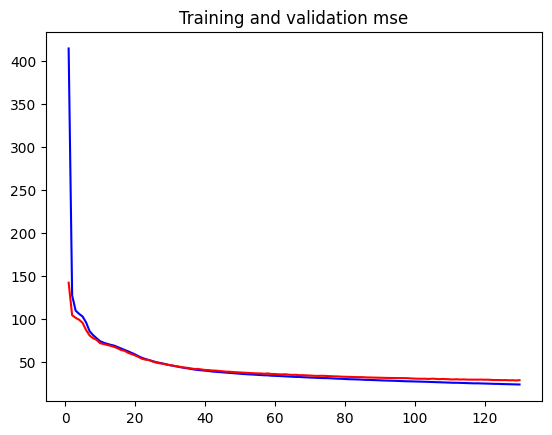

In [40]:
train_mse = hist.history["mse"]
valid_mse = hist.history["val_mse"]
plt.plot(ep, train_mse, "b-")
plt.plot(ep, valid_mse, "r-")
plt.title("Training and validation mse")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/stepWARNING:tensorflow:5 out of the last 45 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026198625080> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


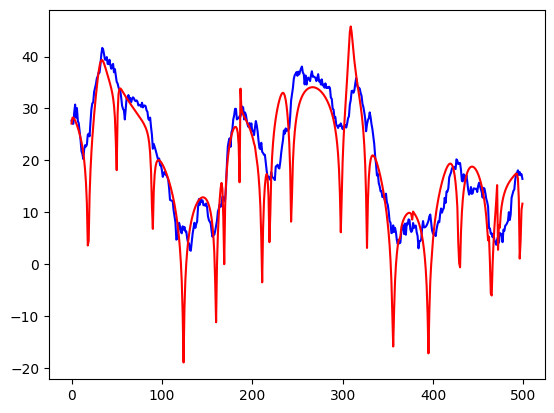

In [45]:
y_p = model.predict(X_test)
plt.plot(y_p[0, :], "b-")
plt.plot(y_test[0, :], 'r-')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


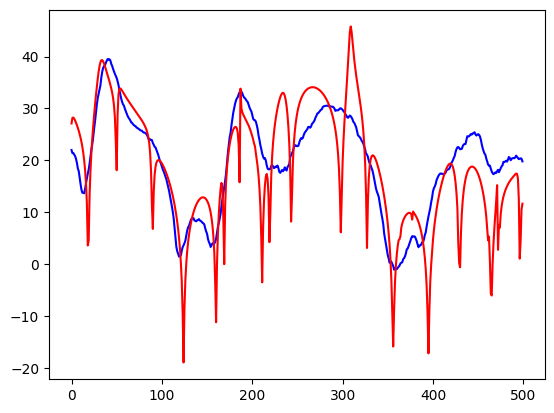

In [50]:
y_p = model.predict(X_test)
plt.plot(y_p[0, :], "b-")
plt.plot(y_test[0, :], 'r-')